In [2]:
library("methylKit")
#library("genomation")
library("clusterProfiler")
library("biomaRt")
library("org.Hs.eg.db")
#library('annotatr')

In [42]:
# Prepare a list of files to be analyzed
file.list = list('/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD1.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD2.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD3.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD4.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD5.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD6.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD7.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD8.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD9.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD10.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD11.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD12.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD13.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD14.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD15.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD16.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD17.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD18.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD19.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD20.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD1.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD2.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD3.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD4.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD5.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD6.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD7.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD8.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD9.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD10.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD11.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD12.mincov0.txt',
                 #'/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD13.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD14.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD15.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD16.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD17.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD18.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD19.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD20.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD21.mincov0.txt')


myobj = methRead(file.list,
                 pipeline="amp",
                 sample.id=list("old1","old2","old3","old4","old5","old6","old7","old8","old9","old10",
                                "old11","old12","old13","old14","old15","old16","old17","old18","old19","old20",
                                "young1","young2","young3","young4","young5","young6","young7","young8","young9","young10",
                                "young11","young12","young14","young15","young16","young17","young18","young19","young20","young21"),
                 assembly="hg19",
                 treatment=c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
                 context="CpG",
                 )

Received list of locations.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.



In [43]:
# Filter out CpG sites with too few or too many reads
filtered.myobj = filterByCoverage(myobj, lo.count=10, lo.perc=NULL, hi.count=NULL, hi.perc=NULL)

In [44]:
head(filtered.myobj)

[[1]]
methylRaw object with 2619762 rows
--------------
   chr start   end strand coverage numCs numTs
1 chr1 10497 10497      +       87    78     9
2 chr1 10525 10525      +       87    78     9
3 chr1 10542 10542      +       69    69     0
4 chr1 10589 10589      +       26    20     6
5 chr1 10609 10609      +       25    21     4
6 chr1 10617 10617      +       25    21     4
--------------
sample.id: old1 
assembly: hg19 
context: CpG 
resolution: base 


[[2]]
methylRaw object with 2673662 rows
--------------
   chr start   end strand coverage numCs numTs
1 chr1 10497 10497      +      350   294    56
2 chr1 10525 10525      +      341   304    37
3 chr1 10542 10542      +      326   326     0
4 chr1 10589 10589      +       18    17     1
5 chr1 10609 10609      +       17    14     3
6 chr1 10617 10617      +       19    16     3
--------------
sample.id: old2 
assembly: hg19 
context: CpG 
resolution: base 


[[3]]
methylRaw object with 2691131 rows
--------------
   chr start   end strand coverage numCs numTs
1 chr1 10497 10497      +      163   150    13
2 chr1 10525 10525      +      161   148    13
3 chr1 10542 10542      +      152   152     0
4 chr1 10589 10589      +       15    14     1
5 chr1 10609 10609      +       15    13     2
6 chr1 10617 10617      +       16    16     0
--------------
sample.id: old3 
assembly: hg19 
context: CpG 
resolution: base 


[[4]]
methylRaw object with 2638508 rows
--------------
   chr start   end strand coverage numCs numTs
1 chr1 10497 10497      +      297   230    67
2 chr1 10525 10525      +      290   275    15
3 chr1 10542 10542      +      268   268     0
4 chr1 10589 10589      +       30    29     1
5 chr1 10609 10609      +       29    27     2
6 chr1 10617 10617      +       30    24     6
--------------
sample.id: old4 
assembly: hg19 
context: CpG 
resolution: base 


[[5]]
methylRaw object with 2806581 rows
--------------
   chr  start    end strand coverage numCs numTs
1 chr1  10497  10497      +      142   136     6
2 chr1  10525  10525      +      139   137     2
3 chr1  10542  10542      +      135   135     0
4 chr1 133165 133165      +       63    63     0
5 chr1 133180 133180      +       59    57     2
6 chr1 133181 133181      -       62    60     2
--------------
sample.id: old5 
assembly: hg19 
context: CpG 
resolution: base 


[[6]]
methylRaw object with 2707949 rows
--------------
   chr  start    end strand coverage numCs numTs
1 chr1  10497  10497      +      281   246    35
2 chr1  10525  10525      +      278   262    16
3 chr1  10542  10542      +      264   264     0
4 chr1 133165 133165      +       39    37     2
5 chr1 133180 133180      +       39    34     5
6 chr1 133181 133181      -       45    45     0
--------------
sample.id: old6 
assembly: hg19 
context: CpG 
resolution: base

In [45]:
# Generate methylation matrix by combining all samples. By default it includes only those CpGs which are covered by reads in each sample.
meth = unite(filtered.myobj) 

uniting...



In [46]:
dim(meth)

[1] 1463203     124

The "ward" method has been renamed to "ward.D"; note new "ward.D2"




Call:
hclust(d = d, method = HCLUST.METHODS[hclust.method])

Cluster method   : ward.D 
Distance         : pearson 
Number of objects: 40 


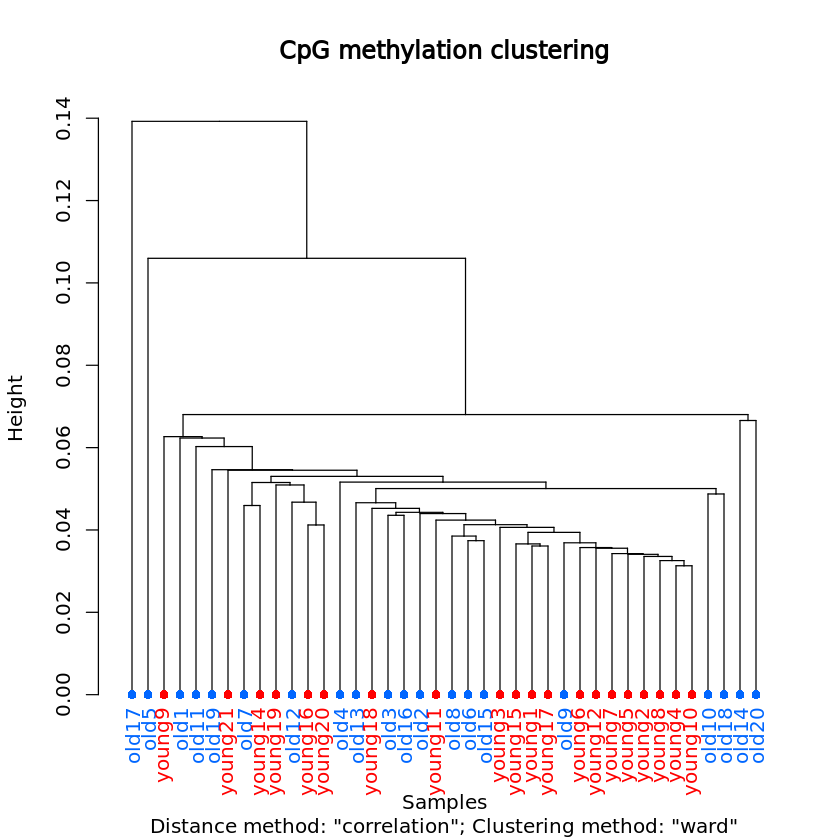

In [47]:
# Sample clusterization
clusterSamples(meth, dist="correlation", method="ward", plot=TRUE)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"




Call:
hclust(d = d, method = HCLUST.METHODS[hclust.method])

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 40 


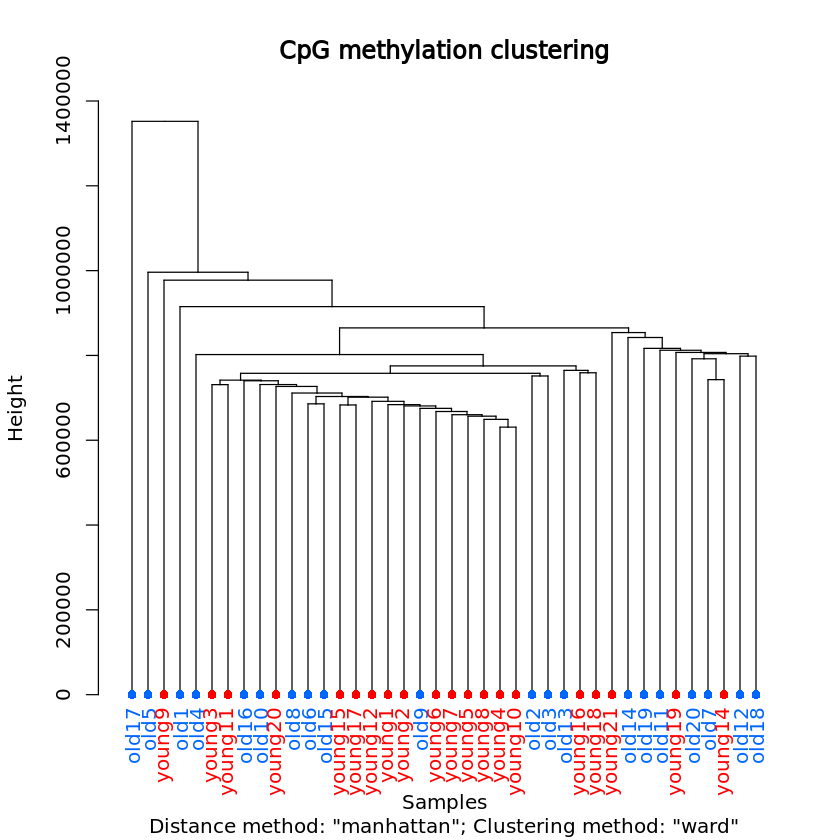

In [48]:
# Sample clusterization
clusterSamples(meth, dist="manhattan", method="ward", plot=TRUE)

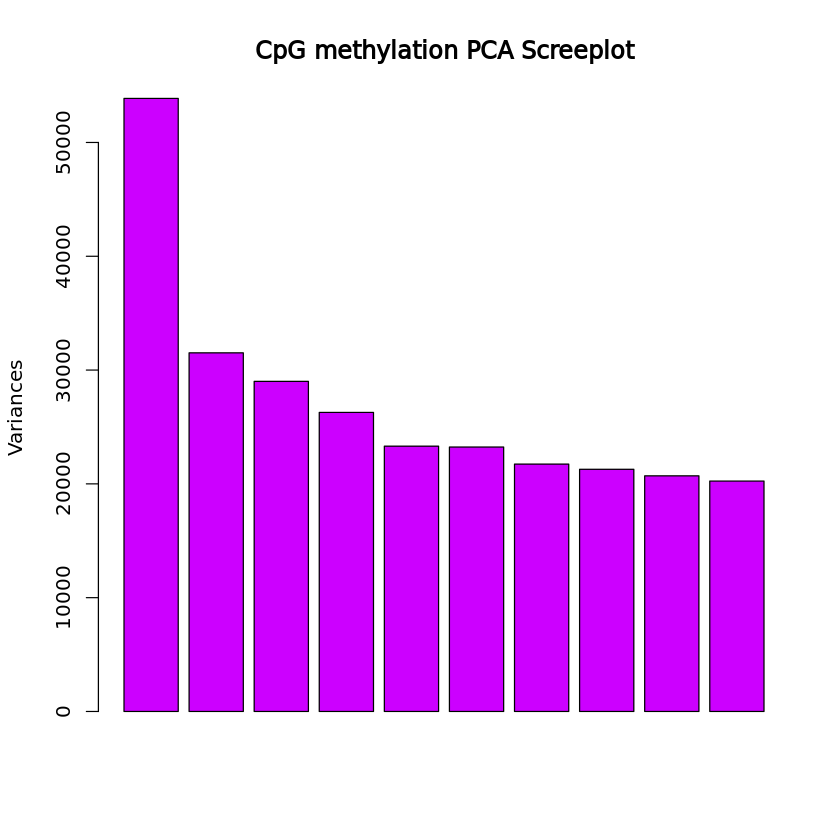

In [49]:
PCASamples(meth, screeplot=TRUE)

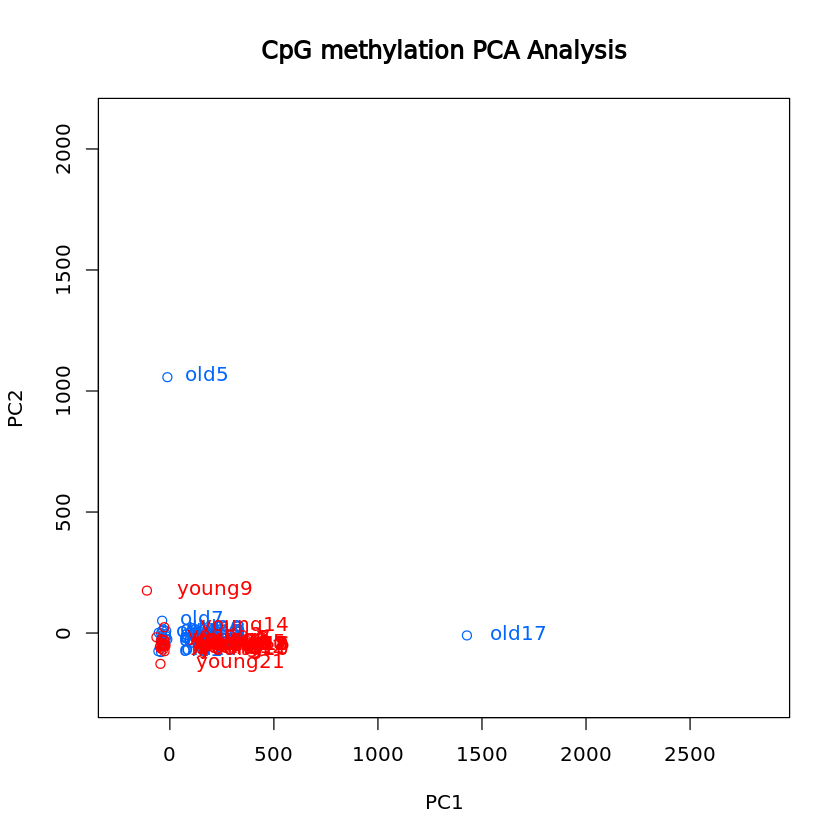

In [50]:
pc = PCASamples(meth, obj.return=TRUE, adj.lim=c(1,1))

In [3]:
# Prepare a list of files to be analyzed
file.list = list('/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD1.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD2.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD3.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD4.mincov0.txt',
                #'/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD5.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD6.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD7.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD8.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD9.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD10.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD11.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD12.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD13.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD14.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD15.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD16.mincov0.txt',
                 #'/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD17.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD18.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD19.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.OD20.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD1.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD2.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD3.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD4.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD5.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD6.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD7.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD8.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD9.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD10.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD11.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD12.mincov0.txt',
                 #'/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD13.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD14.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD15.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD16.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD17.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD18.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD19.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD20.mincov0.txt',
                 '/home/Anastasiia.Dudkovskaia/omics/final_project/data/methylcall.CpG.YD21.mincov0.txt')


myobj = methRead(file.list,
                 pipeline="amp",
                 sample.id=list("old1","old2","old3","old4","old6","old7","old8","old9","old10",
                                "old11","old12","old13","old14","old15","old16","old18","old19","old20",
                                "young1","young2","young3","young4","young5","young6","young7","young8","young9","young10",
                                "young11","young12","young14","young15","young16","young17","young18","young19","young20","young21"),
                 assembly="hg19",
                 treatment=c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
                 context="CpG",
                 )

Received list of locations.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.

Reading file.



In [4]:
# Filter out CpG sites with too few or too many reads
filtered.myobj = filterByCoverage(myobj, lo.count=10, lo.perc=NULL, hi.count=NULL, hi.perc=NULL)

In [5]:
# Generate methylation matrix by combining all samples. By default it includes only those CpGs which are covered by reads in each sample.
meth = unite(filtered.myobj) 

uniting...



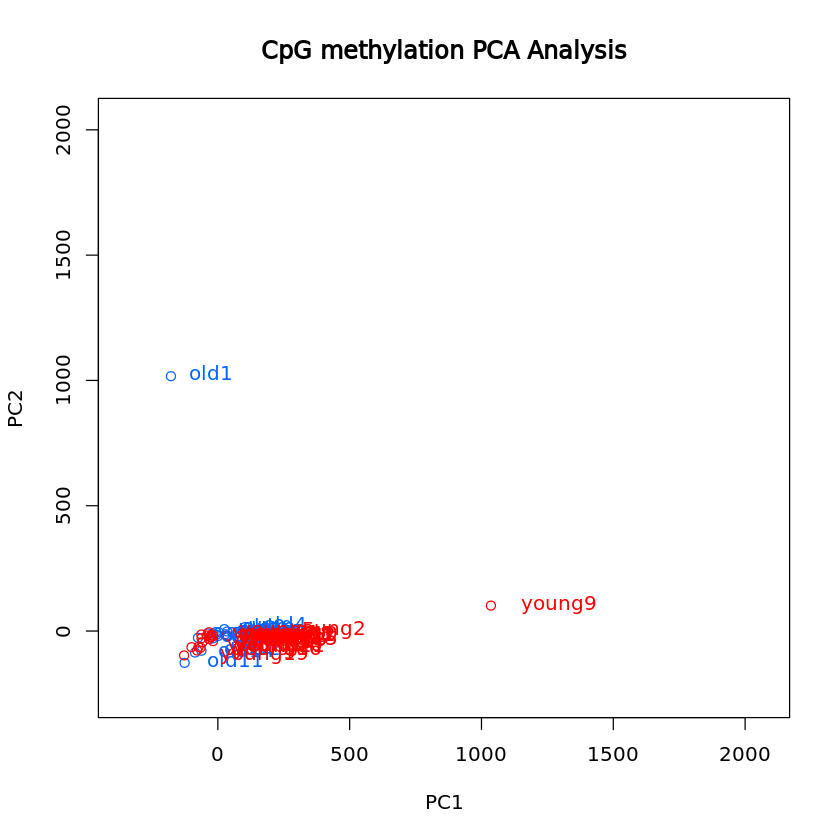

In [54]:
pc = PCASamples(meth, obj.return=TRUE, adj.lim=c(1,1))

The "ward" method has been renamed to "ward.D"; note new "ward.D2"




Call:
hclust(d = d, method = HCLUST.METHODS[hclust.method])

Cluster method   : ward.D 
Distance         : pearson 
Number of objects: 38 


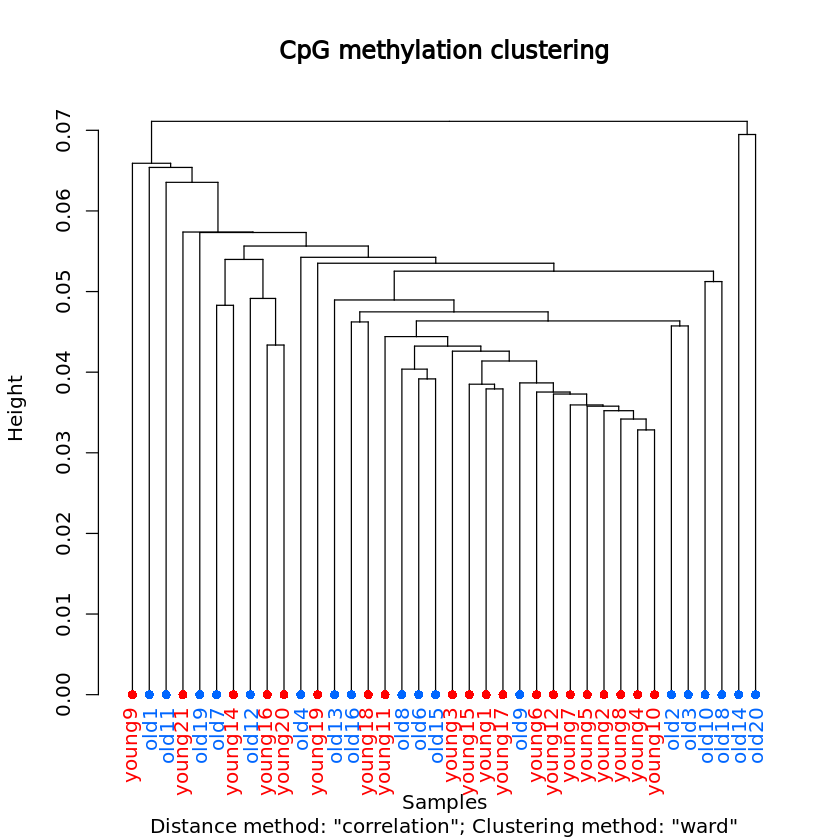

In [55]:
# Sample clusterization
clusterSamples(meth, dist="correlation", method="ward", plot=TRUE)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"




Call:
hclust(d = d, method = HCLUST.METHODS[hclust.method])

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 38 


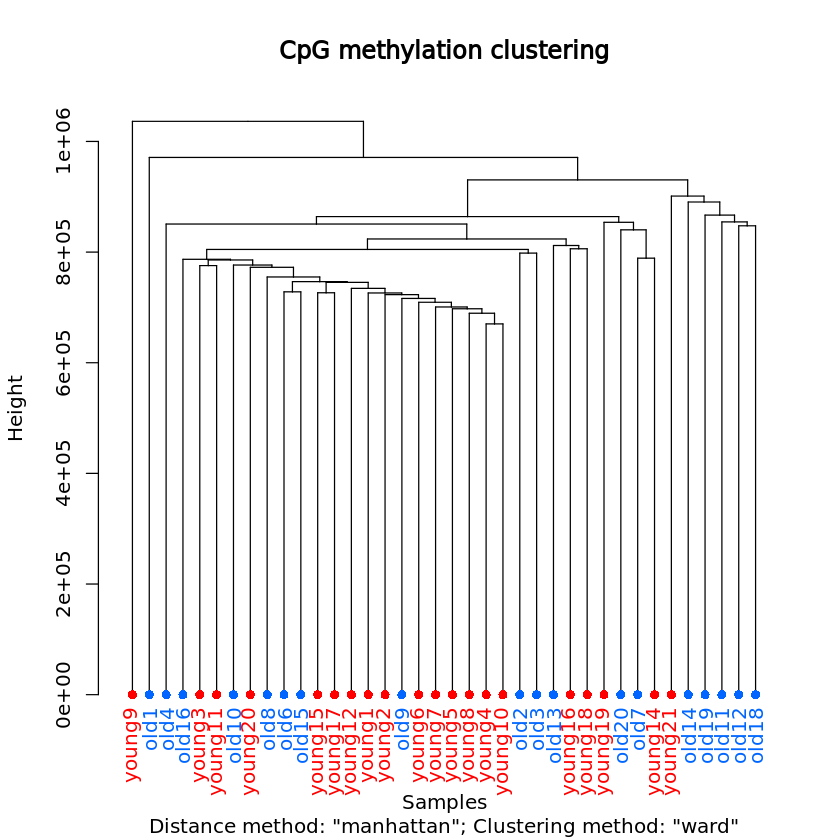

In [56]:
# Sample clusterization
clusterSamples(meth, dist="manhattan", method="ward", plot=TRUE)

In [24]:
# Run differential analysis 

# THIS IS A LONG ONE
# You're free to grab a cup of tea or to go touch the grass while it runs (~1 h or more)
# Here I saved the data because diff methylation
myDiff = calculateDiffMeth(meth, test = "Chisq", overdispersion ='MN', save.db = TRUE)

two groups detected:
 will calculate methylation difference as the difference of
treatment (group: 1) - control (group: 0)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fi

In [179]:
myDiff <- readMethylDB('/home/Anastasiia.Dudkovskaia/omics/final_project/methylDB_2024-05-06_pq3/1/methylDiff_36091122275b1.txt.bgz')

In [180]:
myDiff

methylDiffDB object with 1489492 rows
--------------
   chr  start    end strand      pvalue    qvalue  meth.diff
1 chr1  10497  10497      + 0.630323064 0.9444653 -0.9738893
2 chr1  10525  10525      + 0.023933200 0.5030619  1.7498243
3 chr1  10542  10542      + 0.008537363 0.3816641  0.1052816
4 chr1 567207 567207      - 0.146648295 0.6955764 -6.5374328
5 chr1 567240 567240      - 0.168825244 0.7131458 -6.2937620
6 chr1 662657 662657      + 0.731261529 0.9620817 -0.4730294
--------------
sample.ids: old1 old2 old3 old4 old6 old7 old8 old9 old10 old11 old12 old13 old14 old15 old16 old18 old19 old20 young1 young2 young3 young4 young5 young6 young7 young8 young9 young10 young11 young12 young14 young15 young16 young17 young18 young19 young20 young21 
destranded FALSE 
assembly: hg19 
context: CpG 
treament: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
resolution: base 
dbtype: tabix 


In [181]:
myDiff = as(myDiff,"methylDiff")

Uncompressing file.

Reading file.



In [182]:
# The "difference" parameter sets the percentage threshold for differences in methylation levels
myDiff25 = getMethylDiff(myDiff, difference=25, pvalue=0.05)

In [183]:
myDiff25

chr   start     end       strand pvalue       qvalue       meth.diff
41197   chr1   24718431  24718431 -      1.880321e-12 5.499029e-08 -27.52813
51869   chr1   33772891  33772891 -      4.613416e-18 2.560047e-12  26.71134
255046  chr11  72533289  72533289 -      2.694970e-06 5.312142e-03  28.54055
255047  chr11  72533296  72533296 -      9.948805e-07 2.582748e-03  28.32580
255050  chr11  72533303  72533303 -      8.441853e-07 2.317869e-03  26.48336
255051  chr11  72533305  72533305 -      1.597890e-06 3.669546e-03  27.79232
255053  chr11  72533313  72533313 -      1.571391e-06 3.637841e-03  28.00041
255054  chr11  72533322  72533322 -      3.234352e-06 6.074533e-03  27.31068
255055  chr11  72533327  72533327 -      1.544429e-06 3.604539e-03  27.70358
255056  chr11  72533331  72533331 -      4.517079e-06 7.798836e-03  28.19514
255057  chr11  72533333  72533333 +      1.681319e-07 6.619101e-04  26.44008
255058  chr11  72533334  72533334 -      4.287301e-06 7.492388e-03  27.12126
255059  chr11  72533339  72533339 +      1.948851e-06 4.187001e-03  26.55511
255060  chr11  72533357  72533357 +      8.459416e-07 2.317869e-03  28.20898
255061  chr11  72533379  72533379 +      5.265412e-07 1.643879e-03  26.43058
321920  chr12 113683901 113683901 +      6.083900e-11 1.076334e-06 -29.94991
1023114 chr3   51741125  51741125 +      3.719099e-16 4.845015e-11  31.82891
1023118 chr3   51741142  51741142 +      2.403069e-14 1.565286e-09  29.93906
1023119 chr3   51741152  51741152 +      1.852072e-18 2.560047e-12  28.52063
1023120 chr3   51741153  51741153 -      1.022459e-14 7.325983e-10  28.90903
1023121 chr3   51741162  51741162 +      1.673319e-13 7.266328e-09  27.27994
1023122 chr3   51741163  51741163 -      5.359434e-18 2.560047e-12  32.73988
1023123 chr3   51741164  51741164 +      1.046597e-15 1.099068e-10  30.61576
1023124 chr3   51741165  51741165 -      1.219912e-13 6.028103e-09  29.93756
1023125 chr3   51741177  51741177 -      1.878090e-10 2.612940e-06  27.34763
1023126 chr3   51741179  51741179 -      4.268373e-11 7.841839e-07  31.38532
1023132 chr3   51741245  51741245 +      1.131325e-11 2.456369e-07  26.30258
1023138 chr3   51741474  51741474 -      1.630178e-09 1.567830e-05  25.41267
1178449 chr5  172110654 172110654 -      2.127752e-06 4.503835e-03  25.23438
1178452 chr5  172110662 172110662 +      3.596711e-13 1.472610e-08  26.19659
1178460 chr5  172110708 172110708 +      1.703621e-11 3.487588e-07  25.32738
1178461 chr5  172110711 172110711 +      8.148745e-16 9.731049e-11  33.44014
1178464 chr5  172110760 172110760 -      2.717587e-12 7.489111e-08  26.85109
1178468 chr5  172110784 172110784 -      4.003837e-10 4.781293e-06  27.31787
1178469 chr5  172110788 172110788 -      3.637963e-11 6.859537e-07  27.13655
1178474 chr5  172110888 172110888 +      5.046967e-11 9.154899e-07  27.09665
1178475 chr5  172110895 172110895 +      3.032339e-08 1.773625e-04  26.44341
1178496 chr5  172111049 172111049 +      4.347812e-09 3.730821e-05  25.61651
1309197 chr7  101961849 101961849 -      1.696491e-12 5.172539e-08  31.01808
1309199 chr7  101961854 101961854 -      3.765491e-11 7.007789e-07  30.83858
1309200 chr7  101961858 101961858 -      8.669913e-12 1.972079e-07  30.59696
1309201 chr7  101961866 101961866 -      1.134596e-12 3.781140e-08  32.26085
1309202 chr7  101961875 101961875 -      1.488116e-10 2.194045e-06  29.28943
1309203 chr7  101961882 101961882 -      1.189545e-10 1.888097e-06  30.68148
1309204 chr7  101961885 101961885 -      8.240843e-11 1.405861e-06  30.48414
1309205 chr7  101961888 101961888 -      1.079203e-12 3.771980e-08  32.14275
1309207 chr7  101961891 101961891 -      8.963448e-08 4.013981e-04  26.87547
1309208 chr7  101961893 101961893 +      1.783872e-08 1.161143e-04  25.10336
1309209 chr7  101961901 101961901 +      2.799876e-09 2.555579e-05  25.37525

In [98]:
ensembl97 <- useEnsembl(biomart = 'genes', dataset = 'hsapiens_gene_ensembl')

In [67]:
# Get genes annotation - TSSs and chromosomes
g <- getBM(attributes=c('ensembl_gene_id','chromosome_name',"transcription_start_site"), mart = ensembl97)

In [68]:
# Here we want to obtain the same types of chromosome labels for data with CpGs and genes
g$chromosome_name <- sub("^", "chr", g$chromosome_name)

In [69]:
# Annotation contains several TSSs for some genes, but we want to keep only one for convenience
# This will not affect the results, because each CpG will be assigned to the closest TSS
g=g[!duplicated(g[, c("ensembl_gene_id")], fromLast=F),]

In [70]:
# Make a GRanges object from the genes table
genes_all = makeGRangesFromDataFrame(g,
                                     keep.extra.columns=T,
                                     ignore.strand=T,
                                     seqinfo=NULL,
                                     seqnames.field=c("chromosome_name"),
                                     start.field="transcription_start_site",
                                     end.field=c("transcription_start_site"))


In [184]:
# Make a GRanges object from the table with strong differentially methylated CpGs
mydiff25_ranges = makeGRangesFromDataFrame(as(myDiff25,"methylDiff"), keep.extra.columns=F)

In [185]:
# Find the nearest TSS for each CpG
x = nearest(mydiff25_ranges, genes_all)

In [186]:
myDiff25['nearest_tss'] = g[x,'transcription_start_site']

In [187]:
myDiff25['nearest_gene'] = g[x,'ensembl_gene_id']

In [188]:
head(myDiff25)

chr   start    end      strand pvalue       qvalue       meth.diff
41197  chr1  24718431 24718431 -      1.880321e-12 5.499029e-08 -27.52813
51869  chr1  33772891 33772891 -      4.613416e-18 2.560047e-12  26.71134
255046 chr11 72533289 72533289 -      2.694970e-06 5.312142e-03  28.54055
255047 chr11 72533296 72533296 -      9.948805e-07 2.582748e-03  28.32580
255050 chr11 72533303 72533303 -      8.441853e-07 2.317869e-03  26.48336
255051 chr11 72533305 72533305 -      1.597890e-06 3.669546e-03  27.79232
       nearest_tss nearest_gene   
41197  24704894    ENSG00000284699
51869  33838523    ENSG00000227000
255046 72535038    ENSG00000290016
255047 72535038    ENSG00000290016
255050 72535038    ENSG00000290016
255051 72535038    ENSG00000290016

In [189]:
myDiff25_x1 = myDiff25[myDiff25$meth.diff>0,]
myDiff25_x2 = myDiff25[myDiff25$meth.diff<0,]

In [190]:
myDiff25_x1

chr   start     end       strand pvalue       qvalue       meth.diff
51869   chr1   33772891  33772891 -      4.613416e-18 2.560047e-12 26.71134 
255046  chr11  72533289  72533289 -      2.694970e-06 5.312142e-03 28.54055 
255047  chr11  72533296  72533296 -      9.948805e-07 2.582748e-03 28.32580 
255050  chr11  72533303  72533303 -      8.441853e-07 2.317869e-03 26.48336 
255051  chr11  72533305  72533305 -      1.597890e-06 3.669546e-03 27.79232 
255053  chr11  72533313  72533313 -      1.571391e-06 3.637841e-03 28.00041 
255054  chr11  72533322  72533322 -      3.234352e-06 6.074533e-03 27.31068 
255055  chr11  72533327  72533327 -      1.544429e-06 3.604539e-03 27.70358 
255056  chr11  72533331  72533331 -      4.517079e-06 7.798836e-03 28.19514 
255057  chr11  72533333  72533333 +      1.681319e-07 6.619101e-04 26.44008 
255058  chr11  72533334  72533334 -      4.287301e-06 7.492388e-03 27.12126 
255059  chr11  72533339  72533339 +      1.948851e-06 4.187001e-03 26.55511 
255060  chr11  72533357  72533357 +      8.459416e-07 2.317869e-03 28.20898 
255061  chr11  72533379  72533379 +      5.265412e-07 1.643879e-03 26.43058 
1023114 chr3   51741125  51741125 +      3.719099e-16 4.845015e-11 31.82891 
1023118 chr3   51741142  51741142 +      2.403069e-14 1.565286e-09 29.93906 
1023119 chr3   51741152  51741152 +      1.852072e-18 2.560047e-12 28.52063 
1023120 chr3   51741153  51741153 -      1.022459e-14 7.325983e-10 28.90903 
1023121 chr3   51741162  51741162 +      1.673319e-13 7.266328e-09 27.27994 
1023122 chr3   51741163  51741163 -      5.359434e-18 2.560047e-12 32.73988 
1023123 chr3   51741164  51741164 +      1.046597e-15 1.099068e-10 30.61576 
1023124 chr3   51741165  51741165 -      1.219912e-13 6.028103e-09 29.93756 
1023125 chr3   51741177  51741177 -      1.878090e-10 2.612940e-06 27.34763 
1023126 chr3   51741179  51741179 -      4.268373e-11 7.841839e-07 31.38532 
1023132 chr3   51741245  51741245 +      1.131325e-11 2.456369e-07 26.30258 
1023138 chr3   51741474  51741474 -      1.630178e-09 1.567830e-05 25.41267 
1178449 chr5  172110654 172110654 -      2.127752e-06 4.503835e-03 25.23438 
1178452 chr5  172110662 172110662 +      3.596711e-13 1.472610e-08 26.19659 
1178460 chr5  172110708 172110708 +      1.703621e-11 3.487588e-07 25.32738 
1178461 chr5  172110711 172110711 +      8.148745e-16 9.731049e-11 33.44014 
1178464 chr5  172110760 172110760 -      2.717587e-12 7.489111e-08 26.85109 
1178468 chr5  172110784 172110784 -      4.003837e-10 4.781293e-06 27.31787 
1178469 chr5  172110788 172110788 -      3.637963e-11 6.859537e-07 27.13655 
1178474 chr5  172110888 172110888 +      5.046967e-11 9.154899e-07 27.09665 
1178475 chr5  172110895 172110895 +      3.032339e-08 1.773625e-04 26.44341 
1178496 chr5  172111049 172111049 +      4.347812e-09 3.730821e-05 25.61651 
1309197 chr7  101961849 101961849 -      1.696491e-12 5.172539e-08 31.01808 
1309199 chr7  101961854 101961854 -      3.765491e-11 7.007789e-07 30.83858 
1309200 chr7  101961858 101961858 -      8.669913e-12 1.972079e-07 30.59696 
1309201 chr7  101961866 101961866 -      1.134596e-12 3.781140e-08 32.26085 
1309202 chr7  101961875 101961875 -      1.488116e-10 2.194045e-06 29.28943 
1309203 chr7  101961882 101961882 -      1.189545e-10 1.888097e-06 30.68148 
1309204 chr7  101961885 101961885 -      8.240843e-11 1.405861e-06 30.48414 
1309205 chr7  101961888 101961888 -      1.079203e-12 3.771980e-08 32.14275 
1309207 chr7  101961891 101961891 -      8.963448e-08 4.013981e-04 26.87547 
1309208 chr7  101961893 101961893 +      1.783872e-08 1.161143e-04 25.10336 
1309209 chr7  101961901 101961901 +      2.799876e-09 2.555579e-05 25.37525 
        nearest_tss nearest_gene   
51869    33838523   ENSG00000227000
255046   72535038   ENSG00000290016
255047   72535038   ENSG00000290016
255050   72535038   ENSG00000290016
255051   72535038   ENSG00000290016
255053   72535038   ENSG00000290016
255054   72535038   ENSG00000290016
255055   72535038   ENSG

In [191]:
# Find genes with at least 1 CpGs assigned.
gene_diffMeth_x1 = table(myDiff25_x1$nearest_gene)
gene_diffMeth_x1 = names(gene_diffMeth_x1[gene_diffMeth_x1>=1])

In [192]:
gene_diffMeth_x1

[1] "ENSG00000072786" "ENSG00000164082" "ENSG00000227000" "ENSG00000272219"
[5] "ENSG00000290016"

In [193]:
# Find genes with at least 1 CpGs assigned.
gene_diffMeth_x2 = table(myDiff25_x2$nearest_gene)
gene_diffMeth_x2 = names(gene_diffMeth_x2[gene_diffMeth_x2>=1])

In [194]:
gene_diffMeth_x2

[1] "ENSG00000249550" "ENSG00000284699"

In [195]:
mydiff_ranges = makeGRangesFromDataFrame(myDiff, keep.extra.columns=F)
x = nearest(mydiff_ranges, genes_all)

Warning message in .merge_two_Seqinfo_objects(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chrM
  - in 'y': chrMT, chrGL000009.2, chrGL000194.1, chrGL000195.1, chrGL000205.2, chrGL000213.1, chrGL000216.2, chrGL000218.1, chrGL000219.1, chrGL000220.1, chrGL000225.1, chrHG1012_PATCH, chrHG1046_PATCH, chrHG1047_PATCH, chrHG107_HG2565_PATCH, chrHG109_PATCH, chrHG1206_PATCH, chrHG126_PATCH, chrHG1277_PATCH, chrHG1298_PATCH, chrHG1309_PATCH, chrHG1311_HG2539_PATCH, chrHG1320_PATCH, chrHG1342_HG2282_PATCH, chrHG1343_HG173_HG459_PATCH, chrHG1362_PATCH, chrHG1369_PATCH, chrHG1384_PATCH, chrHG1395_PATCH, chrHG1398_PATCH, chrHG142_HG150_NOVEL_TEST, chrHG1445_PATCH, chrHG1485_PATCH, chrHG151_NOVEL_TEST, chrHG1524_PATCH, chrHG152_PATCH, chrHG1532_PATCH, chrHG1535_PATCH, chrHG1651_PATCH, chrHG1708_PATCH, chrHG1815_PATCH, chrHG1832_PATCH, chrHG1_PATCH, chrHG2002_PATCH, chrHG2021_PATCH, chrHG2022_PATCH, chrHG2023_PATCH, chrHG2030_PATCH, chrHG2031_PATCH, chrHG

In [196]:
myDiff['nearest_tss'] = g[x, 'transcription_start_site']

myDiff['nearest_gene'] = g[x, 'ensembl_gene_id']

gene_Meth=table(myDiff$nearest_gene)
gene_Meth=names(gene_Meth[gene_Meth>=1])

In [197]:
ego <- enrichGO(gene          = gene_diffMeth_x1,
                universe      = gene_Meth,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'ENSEMBL',
                ont           = 'all',
                pAdjustMethod = 'BH',
                pvalueCutoff  = 1,
                qvalueCutoff  = 1)

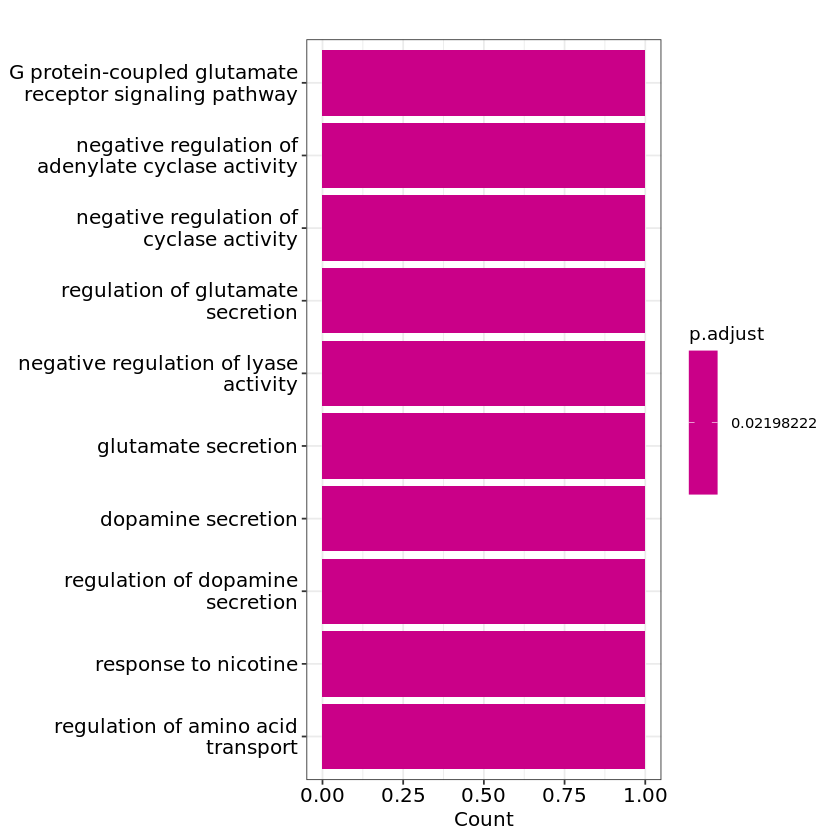

In [198]:
barplot(ego, showCategory=10)

In [199]:
ego <- enrichGO(gene          = gene_diffMeth_x2,
                universe      = gene_Meth,
                OrgDb         = org.Hs.eg.db,
                keyType       = 'ENSEMBL',
                ont           = 'all',
                pAdjustMethod = 'BH',
                pvalueCutoff  = 1,
                qvalueCutoff  = 1)

#ego = simplify(ego)

In [200]:
barplot(ego, showCategory=10)

ERROR: Error in barplot.default(ego, showCategory = 10): 'height' must be a vector or a matrix
